In [5]:
print('Sentiment Analysis Project !! ')


Sentiment Analysis Project !! 


In [7]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [11]:
log = pd.read_csv("C:/Users/Abc/Documents/Python work/Final Project Submission/Login.csv")

consumerkey=log['key'][0]
consumersecret=log['key'][1]
accesstoken=log['key'][2]
accesstokensecret=log['key'][3]

In [12]:
authenticate =tweepy.OAuthHandler(consumerkey,consumersecret)
authenticate.set_access_token(accesstoken,accesstokensecret)

api=tweepy.API(authenticate,wait_on_rate_limit=True)

In [13]:

searchTerm = input("enter keyword/hashtag to be searched about : ")
noofsearch = int(input("Enter how many tweets to analyse : "))

post= api.search(q = searchTerm +" -filter:retweets", count = noofsearch, lang= "en", tweet_mode= "extended")
print('recent posts')
i=1
for tweet in post [0:10]:
    print(str(i) + ')' + tweet.full_text + '\n')
    i=i+1

enter keyword/hashtag to be searched about : ram mandir
Enter how many tweets to analyse : 2000
recent posts
1)What unrest spreading Muzlims don't like
üëâShaheen Bagh activist joins #BJP
üëâUAE-Israel #peace deal
üëâRam Mandir
üëâ #370 Scrapped

but they like
üëâ #HagiaSophia first church then museum's conversion to mosque
üëâ #DelhiRiots
üëâ #BangluruRiots 
üëâShaheen Bagh Hijack https://t.co/EFBOWiAlUF

2)@khanumarfa By building Ram Mandir
Melting Liberals 
And distributing Burnol 
to people like you

3)@frontierindica yeah obviously will do. Those places i mentioned were quite long back. 
Chota Char Dham, Bada char dham, 12 Jyotirlingas, all in bucket list. 
Have visited Krishna Janmabhoomi, waiting for Ram mandir.

4)@mirza_sam_khans @ApoorvT99895263 Modi's development -

Demonetization
GST
CAA/NRC
Ram Mandir
Article 370 which lead to Kashmir lockdown for more than a year which is completely barbaric 

6 years of useless PM

5)@Lonewolf_Tiger @Muralik79739498 @tripathisam2

header_list = ["Tweets"]
df = pd.read_csv('tweet.csv',names=header_list)

In [15]:
df=pd.DataFrame([tweet.full_text for tweet in post], columns=['tweets'])
df['id'] = np.array([tweet.id for tweet in post])
df['date'] = np.array([tweet.created_at for tweet in post])
df['source'] = np.array([tweet.source for tweet in post])
df['likes'] = np.array([tweet.favorite_count for tweet in post])
df['retweets'] = np.array([tweet.retweet_count for tweet in post])



df.to_csv('tweets_exported.csv', encoding='utf-8')
df.head()
df.shape
    



(63, 6)

In [16]:
#clean data
def clean(text):
    text=re.sub(r'@[A-Za-z0-9]+', '', text) #remove tags
    text=re.sub(r'# ','', text) #remove hashtags
    text=re.sub(r'RT[\s]+','', text) #remove retweets
    text=re.sub(r'https?:\/\/\S','', text) #remove hyperlinks
    
    return text

punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
def remove_punct(text):
    text  = "".join([char for char in text if char not in punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['tweets']= df['tweets'].apply(clean)
df['tweets'] = df['tweets'].apply(lambda x: remove_punct(x))

df.head(10)

df.to_csv('tweets_exported_cleaned.csv', encoding='utf-8')
    

In [17]:
!pip install HTMLParser


  Created wheel for HTMLParser: filename=HTMLParser-0.0.2-py3-none-any.whl size=5990 sha256=9d6fe05613f4e8edcd0d43447e8e41fdb34b2c8bc5fd29112ac911d1afca36c8
  Stored in directory: c:\users\abc\appdata\local\pip\cache\wheels\9f\7b\64\cf65da15e5a30eddb638171572e3a9ea32f739d488d5b16fac
Successfully built HTMLParser


In [18]:
from html.parser import HTMLParser
#import markupbase
html_parser = HTMLParser()
df['tweets'] = html_parser.unescape(df['tweets'])
df.to_csv('tweets_exported_cleaned_htmlparsing.csv', encoding='utf-8')

<ipython-input-18-6e5f8d9044d5>:4: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  df['tweets'] = html_parser.unescape(df['tweets'])


In [19]:
#defining subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#defining polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#new columns 

df['Subjectivity'] = df['tweets'].apply(getSubjectivity)
df['Polarity'] = df['tweets'].apply(getPolarity)

df.head()


tweets                   id  \
0  What unrest spreading Muzlims dont like\nüëâShah...  1295072820137885696   
1   By building Ram Mandir\nMelting Liberals \nAn...  1295072773765648384   
2   yeah obviously will do Those places i mention...  1295072148319420417   
3  samkhans  Modis development \n\nDemonetization...  1295072104799285248   
4  Tiger    If there is any proof of mandir at th...  1295071422369288192   

                 date               source  likes  retweets  Subjectivity  \
0 2020-08-16 18:59:56  Twitter for Android      0         0      0.333333   
1 2020-08-16 18:59:45  Twitter for Android      0         0      0.000000   
2 2020-08-16 18:57:16      Twitter Web App      1         0      0.300000   
3 2020-08-16 18:57:05  Twitter for Android      0         0      0.366667   
4 2020-08-16 18:54:23  Twitter for Android      0         0      0.200000   

   Polarity  
0  0.250000  
1  0.000000  
2 -0.016667  
3  0.033333  
4  0.000000

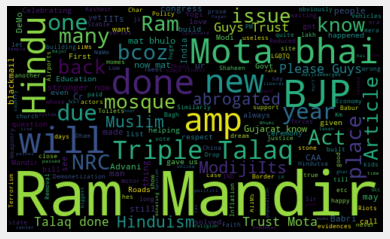

In [20]:
#Plot the word cloud

allWords = ' '.join([twts for twts in df['tweets']])
wordCloud = WordCloud(width= 500, height = 300, random_state= 25, max_font_size= 120).generate(allWords)
plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show();



In [21]:
#function to create positive, negative, neutral

def getAnalysis(score):
    if score< 0 :
        return 'Negative'
    elif score == 0 :
         return 'Neutral'
    else :
         return 'Positive'
        
df['Analysis']= df['Polarity'].apply(getAnalysis)
df.to_csv('tweets_exported_cleaned_with_Classification.csv', encoding='utf-8')
df.head(20)
        
       

tweets                   id  \
0   What unrest spreading Muzlims dont like\nüëâShah...  1295072820137885696   
1    By building Ram Mandir\nMelting Liberals \nAn...  1295072773765648384   
2    yeah obviously will do Those places i mention...  1295072148319420417   
3   samkhans  Modis development \n\nDemonetization...  1295072104799285248   
4   Tiger    If there is any proof of mandir at th...  1295071422369288192   
5     Hagia Sophia is one of UNESCOs cultural heri...  1295071106756485120   
6    bahrain Its a fake propaganda \nIt was a RAM ...  1295070251084906498   
7   IND They are planning their move\nOne thing I ...  1295067828941283329   
8    Jammu   Have PatienceHave Faith in BJP\nSyste...  1295067639937675269   
9    After Ram Mandir it seems BJP forgot preachin...  1295067519321956352   
10   Competition is always close till BJP begin it...  1295067398899286016   
11  AskTrueIndology\nCan explain why Goswami Tulsi...  1295067196364750848   
12      Advani ji lived long enough to see Ram Mandir  1295067015560990720   
13   Sir it‚Äôs been  days and you still haven‚Äôt twe...  1295066264969207809   
14   Evrythin is true may b\n\nBut congress has ne...  1295065471067201536   
15  People before Modi Govt said tht Hindu is been...  1295064328270274560   
16   I love Dhoni  hes really a legend  hes selfle...  1295063040124043264   
17                          By Building Ram Mandirüö©üö©üö©  1295062537478844418   
18   Advani is a man whose dream of ram mandir cam...  1295062237208391680   
19   Please Guys Trust Mota bhai and ModijiIts jus...  1295061820068130816   

                  date               source  likes  retweets  Subjectivity  \
0  2020-08-16 18:59:56  Twitter for Android      0         0      0.333333   
1  2020-08-16 18:59:45  Twitter for Android      0         0      0.000000   
2  2020-08-16 18:57:16      Twitter Web App      1         0      0.300000   
3  2020-08-16 18:57:05  Twitter for Android      0         0      0.366667   
4  2020-08-16 18:54:23  Twitter for Android      0         0      0.200000   
5  2020-08-16 18:53:07      Twitter Web App      0         0      0.500000   
6  2020-08-16 18:49:43      Twitter Web App      0         0      0.380000   
7  2020-08-16 18:40:06  Twitter for Android      0         0      0.475000   
8  2020-08-16 18:39:21   Twitter for iPhone      0         0      0.247222   
9  2020-08-16 18:38:52  Twitter for Android      0         0      0.000000   
10 2020-08-16 18:38:23  Twitter for Android      0         0      0.333333   
11 2020-08-16 18:37:35      Twitter Web App      0         0      0.000000   
12 2020-08-16 18:36:52  Twitter for Android      0         0      0.450000   
13 2020-08-16 18:33:53   Twitter for iPhone      0         0      0.466667   
14 2020-08-16 18:30:44  Twitter for Android      0         0      0.656250   
15 2020-08-16 18:26:11   Twitter for iPhone     13         7      0.400000   
16 2020-08-16 18:21:04  Twitter for Android      1         0      0.658654   
17 2020-08-16 18:19:04      Twitter Web App    107        10      0.000000   
18 2020-08-16 18:17:53  Twitter for Android      0         0      0.825000   
19 2020-08-16 18:16:13  Twitter for Android      0         0      0.500000   

    Polarity  Analysis  
0   0.250000  Positive  
1   0.000000   Neutral  
2  -0.016667  Negative  
3   0.033333  Positive  
4   0.000000   Neutral  
5   0.250000  Positive  
6  -0.120000  Negative  
7   0.175000  Positive  
8   0.108333  Positive  
9   0.000000   Neutral  
10  0.100000  Positive  
11  0.000000   Neutral  
12 -0.025000  Negative  
13  0.250000  Positive  
14  0.231250  Positive  
15  0.000000   Neutral  
16  0.052885  Positive  
17  0.000000   Neutral  
18  0.337500  Positive  
19  0.500000  Positive

Cleaning 
Remove Punctuation
Tokenization
Remove Stop Words
Stemming/Lemmatizing

In [22]:
pd.set_option('display.max_colwidth',280)
df['tweets'].head()

0    What unrest spreading Muzlims dont like\nüëâShaheen Bagh activist joins BJP\nüëâUAEIsrael peace deal\nüëâRam Mandir\nüëâ  Scrapped\n\nbut they like\nüëâ HagiaSophia first church then museums conversion to mosque\nüëâ DelhiRiots\nüëâ BangluruRiots \nüëâShaheen Bagh Hijack coEFBOWiAlUF
1                                                                                                                                                                                         By building Ram Mandir\nMelting Liberals \nAnd distributing Burnol \nto people like you
2                                                                                yeah obviously will do Those places i mentioned were quite long back \nChota Char Dham Bada char dham  Jyotirlingas all in bucket list \nHave visited Krishna Janmabhoomi waiting for Ram mandir
3                                                                                     samkhans  Modis development \n\nDemonetization\nGST\nCAANRC\nRam Man

In [24]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
  
df['Tweet_punct'] = df['tweets'].apply(lambda x: remove_punct(x))
df.to_csv('tweets_exported_removed_punct.csv', encoding='utf-8')
df.head(10)


tweets  \
0             What unrest spreading Muzlims dont like\nüëâShaheen Bagh activist joins BJP\nüëâUAEIsrael peace deal\nüëâRam Mandir\nüëâ  Scrapped\n\nbut they like\nüëâ HagiaSophia first church then museums conversion to mosque\nüëâ DelhiRiots\nüëâ BangluruRiots \nüëâShaheen Bagh Hijack coEFBOWiAlUF   
1                                                                                                                                                                                                  By building Ram Mandir\nMelting Liberals \nAnd distributing Burnol \nto people like you   
2                                                                                         yeah obviously will do Those places i mentioned were quite long back \nChota Char Dham Bada char dham  Jyotirlingas all in bucket list \nHave visited Krishna Janmabhoomi waiting for Ram mandir   
3                                                                                              samkhans  Modis development \n\nDemonetization\nGST\nCAANRC\nRam Mandir\nArticle  which lead to Kashmir lockdown for more than a year which is completely barbaric \n\n years of useless PM   
4                 Tiger    If there is any proof of mandir at the site of mosquereligiously we are bound to give back that place to the rightful claimour prayers at such places are not acceptable\nPoint i want to make is that This Ram janam bhoomi thing is a totally political issue   
5                                                                   Hagia Sophia is one of UNESCOs cultural heritage site\nIf Ram Mandir case was to be judged by ownership of land It may have gone to Muslims\nBut these have a huge symbolic value and this was a murderous take by him   
6   bahrain Its a fake propaganda \nIt was a RAM Mandir since s of year \nAnd we all know the history as how amp who it was broken amp structure was built over it \ns of Historical evidences are available to prove this including archeological evidences which help to decide by court   
7     IND They are planning their move\nOne thing I like about Amir At least he has made his inclinations known openly How many Hindu actors will do it When Ram Mandir foundation stone laying ceremony was done how many Hindu actors or Bollywood personalities had paid their respects   
8                   Jammu   Have PatienceHave Faith in BJP\nSystems can‚Äôt be changed overnight\nyrs of mess is been getting solved in last yrsArticleA Ram Mandir Infrastructure Demonetization Blackmoney Smuggling Border IssuesTerrorism Economy State Politicsissues r many all solved   
9                                                                                                                                                                                                 After Ram Mandir it seems BJP forgot preaching of Ramayan \n                      ‡§Ö‡§π‡§Ç‡§ï‡§æ‡§∞   

                    id                date               source  likes  \
0  1295072820137885696 2020-08-16 18:59:56  Twitter for Android      0   
1  1295072773765648384 2020-08-16 18:59:45  Twitter for Android      0   
2  1295072148319420417 2020-08-16 18:57:16      Twitter Web App      1   
3  1295072104799285248 2020-08-16 18:57:05  Twitter for Android      0   
4  1295071422369288192 2020-08-16 18:54:23  Twitter for Android      0   
5  1295071106756485120 2020-08-16 18:53:07      Twitter Web App      0   
6  1295070251084906498 2020-08-16 18:49:43      Twitter Web App      0   
7  1295067828941283329 2020-08-16 18:40:06  Twitter for Android      0   
8  1295067639937675269 2020-08-16 18:39:21   Twitter for iPhone      0   
9  1295067519321956352 2020-08-16 18:38:52  Twitter for Android      0   

   retweets  Subjectivity  Polarity  Analysis  \
0         0      0.333333  0.250000  Positive   
1         0      0.000000  0.000000   Neutral   
2         0      0.300000 -0.016667  Negative   
3         0      0.366667  0.033333  Positive   
4         0      0.200000  0.00

Tokenization

In [28]:
import re

def tokenize(text):
  tokens = re.split('\W+',text)
  return tokens

df['tweet_clean_tokenized'] = df['Tweet_punct'].apply(lambda x:tokenize(x.lower()))
df['tweet_clean_tokenized'].head(5)
#df['Tweet_punct'].head(5)


0     [what, unrest, spreading, muzlims, dont, like, shaheen, bagh, activist, joins, bjp, uaeisrael, peace, deal, ram, mandir, scrapped, but, they, like, hagiasophia, first, church, then, museums, conversion, to, mosque, delhiriots, banglururiots, shaheen, bagh, hijack, coefbowialuf]
1                                                                                                                                                                                         [, by, building, ram, mandir, melting, liberals, and, distributing, burnol, to, people, like, you]
2                                                              [, yeah, obviously, will, do, those, places, i, mentioned, were, quite, long, back, chota, char, dham, bada, char, dham, jyotirlingas, all, in, bucket, list, have, visited, krishna, janmabhoomi, waiting, for, ram, mandir]
3                                                                                   [samkhans, modis, development, demonetization, gst, caanrc, r

No Stop Words

In [29]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

stopwords[0:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [30]:
def remove_stopwords(txt_tokenized):
  txt_clean = [word for word in txt_tokenized if word not in stopwords]
  return txt_clean

df['tweet_clean_nostopwords'] = df['tweet_clean_tokenized'].apply(lambda x:remove_stopwords(x))
df['tweet_clean_nostopwords'].head(5)

0    [unrest, spreading, muzlims, dont, like, shaheen, bagh, activist, joins, bjp, uaeisrael, peace, deal, ram, mandir, scrapped, like, hagiasophia, first, church, museums, conversion, mosque, delhiriots, banglururiots, shaheen, bagh, hijack, coefbowialuf]
1                                                                                                                                                                               [, building, ram, mandir, melting, liberals, distributing, burnol, people, like]
2                                                                                [, yeah, obviously, places, mentioned, quite, long, back, chota, char, dham, bada, char, dham, jyotirlingas, bucket, list, visited, krishna, janmabhoomi, waiting, ram, mandir]
3                                                                                                     [samkhans, modis, development, demonetization, gst, caanrc, ram, mandir, article, lead, kashmir, lockdown, year, completely, ba

In [33]:
def merge_text(text):
    text  = " ".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
  
df['tweet_ready'] = df['tweet_clean_nostopwords'].apply(lambda x: merge_text(x))
df.to_csv('tweets_exported_ready.csv', encoding='utf-8')
df.head(10)

tweets  \
0             What unrest spreading Muzlims dont like\nüëâShaheen Bagh activist joins BJP\nüëâUAEIsrael peace deal\nüëâRam Mandir\nüëâ  Scrapped\n\nbut they like\nüëâ HagiaSophia first church then museums conversion to mosque\nüëâ DelhiRiots\nüëâ BangluruRiots \nüëâShaheen Bagh Hijack coEFBOWiAlUF   
1                                                                                                                                                                                                  By building Ram Mandir\nMelting Liberals \nAnd distributing Burnol \nto people like you   
2                                                                                         yeah obviously will do Those places i mentioned were quite long back \nChota Char Dham Bada char dham  Jyotirlingas all in bucket list \nHave visited Krishna Janmabhoomi waiting for Ram mandir   
3                                                                                              samkhans  Modis development \n\nDemonetization\nGST\nCAANRC\nRam Mandir\nArticle  which lead to Kashmir lockdown for more than a year which is completely barbaric \n\n years of useless PM   
4                 Tiger    If there is any proof of mandir at the site of mosquereligiously we are bound to give back that place to the rightful claimour prayers at such places are not acceptable\nPoint i want to make is that This Ram janam bhoomi thing is a totally political issue   
5                                                                   Hagia Sophia is one of UNESCOs cultural heritage site\nIf Ram Mandir case was to be judged by ownership of land It may have gone to Muslims\nBut these have a huge symbolic value and this was a murderous take by him   
6   bahrain Its a fake propaganda \nIt was a RAM Mandir since s of year \nAnd we all know the history as how amp who it was broken amp structure was built over it \ns of Historical evidences are available to prove this including archeological evidences which help to decide by court   
7     IND They are planning their move\nOne thing I like about Amir At least he has made his inclinations known openly How many Hindu actors will do it When Ram Mandir foundation stone laying ceremony was done how many Hindu actors or Bollywood personalities had paid their respects   
8                   Jammu   Have PatienceHave Faith in BJP\nSystems can‚Äôt be changed overnight\nyrs of mess is been getting solved in last yrsArticleA Ram Mandir Infrastructure Demonetization Blackmoney Smuggling Border IssuesTerrorism Economy State Politicsissues r many all solved   
9                                                                                                                                                                                                 After Ram Mandir it seems BJP forgot preaching of Ramayan \n                      ‡§Ö‡§π‡§Ç‡§ï‡§æ‡§∞   

                    id                date               source  likes  \
0  1295072820137885696 2020-08-16 18:59:56  Twitter for Android      0   
1  1295072773765648384 2020-08-16 18:59:45  Twitter for Android      0   
2  1295072148319420417 2020-08-16 18:57:16      Twitter Web App      1   
3  1295072104799285248 2020-08-16 18:57:05  Twitter for Android      0   
4  1295071422369288192 2020-08-16 18:54:23  Twitter for Android      0   
5  1295071106756485120 2020-08-16 18:53:07      Twitter Web App      0   
6  1295070251084906498 2020-08-16 18:49:43      Twitter Web App      0   
7  1295067828941283329 2020-08-16 18:40:06  Twitter for Android      0   
8  1295067639937675269 2020-08-16 18:39:21   Twitter for iPhone      0   
9  1295067519321956352 2020-08-16 18:38:52  Twitter for Android      0   

   retweets  Subjectivity  Polarity  Analysis  \
0         0      0.333333  0.250000  Positive   
1         0      0.000000  0.000000   Neutral   
2         0      0.300000 -0.016667  Negative   
3         0      0.366667  0.033333  Positive   
4         0      0.200000  0.00

Stemming

In [34]:
df.dtypes

tweets                             object
id                                  int64
date                       datetime64[ns]
source                             object
likes                               int32
retweets                            int32
Subjectivity                      float64
Polarity                          float64
Analysis                           object
Tweet_punct                        object
tweet_clean_tokenized              object
tweet_clean_nostopwords            object
tweet_ready                        object
dtype: object

In [33]:
df.head()

tweets  \
0                                                                                                                                                                                                                    denise Speak it D  Nobody in politics is a saint   
1                                                                                                                                      International students may need to leave US if their universities transition to onlineonly learning\n\ncopmOEwuVoB cowRdLzanSv   
2  Biden has screws loose and is oldfashioned scared of his conservative DONORS unable to go the distance Hed let corporatists PROFIT from legalisation Bernies plan is to hv neighborhoods that suffered from rampant drugarrests profit instead Sick‚ù§Ô∏è \ncoGjvHbdrY   
3                                                                                                                                                                                                   You are and your ERG party are  to blame  own it \n\ncoFjnUxbgqNu   
4                                                                                                                                                                                                                     Polls   I posted in four expats facebook groups   

                    id                date               source  likes  \
0  1280247132302106625 2020-07-06 21:07:56  Twitter for Android      0   
1  1280247131870236678 2020-07-06 21:07:56             LinkedIn      0   
2  1280247121690734592 2020-07-06 21:07:54      Twitter Web App      0   
3  1280247121162252290 2020-07-06 21:07:54  Twitter for Android      0   
4  1280247120491089923 2020-07-06 21:07:54  Twitter for Android      0   

   retweets  Subjectivity  Polarity  Analysis  \
0         0      0.000000  0.000000   Neutral   
1         0      0.000000  0.000000   Neutral   
2         0      0.384615 -0.288462  Negative   
3         0      1.000000  0.600000  Positive   
4         0      0.000000  0.000000   Neutral   

                                                                                                                                                                                                                                                          Tweet_punct  \
0                                                                                                                                                                                                                    denise Speak it D  Nobody in politics is a saint   
1                                                                                                                                      International students may need to leave US if their universities transition to onlineonly learning\n\ncopmOEwuVoB cowRdLzanSv   
2  Biden has screws loose and is oldfashioned scared of his conservative DONORS unable to go the distance Hed let corporatists PROFIT from legalisation Bernies plan is to hv neighborhoods that suffered from rampant drugarrests profit instead Sick‚ù§Ô∏è \ncoGjvHbdrY   
3                                                                                                                                                                                                   You are and your ERG party are  to blame  own it \n\ncoFjnUxbgqNu   
4                                                                                                                                                                                                                     Polls   I posted in four expats facebook groups   

                                                                                                                                                                                                                                                                     tweet_clean_tokenized  \
0                                      

In [35]:
#Using the machine learning concepts : SVM model
print(df['tweet_ready'].shape)

(63,)


In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

k = cv.fit(df['tweet_ready'])
print(k.vocabulary_)
print(cv.get_feature_names())


{'unrest': 703, 'spreading': 637, 'muzlims': 466, 'dont': 203, 'like': 398, 'shaheen': 606, 'bagh': 55, 'activist': 9, 'joins': 353, 'bjp': 78, 'uaeisrael': 699, 'peace': 502, 'deal': 177, 'ram': 554, 'mandir': 419, 'scrapped': 595, 'hagiasophia': 281, 'first': 249, 'church': 127, 'museums': 461, 'conversion': 148, 'mosque': 450, 'delhiriots': 183, 'banglururiots': 59, 'hijack': 298, 'coefbowialuf': 132, 'building': 96, 'melting': 433, 'liberals': 397, 'distributing': 199, 'burnol': 98, 'people': 505, 'yeah': 734, 'obviously': 481, 'places': 514, 'mentioned': 435, 'quite': 551, 'long': 406, 'back': 53, 'chota': 125, 'char': 122, 'dham': 193, 'bada': 54, 'jyotirlingas': 359, 'bucket': 94, 'list': 399, 'visited': 714, 'krishna': 377, 'janmabhoomi': 347, 'waiting': 718, 'samkhans': 591, 'modis': 446, 'development': 192, 'demonetization': 189, 'gst': 276, 'caanrc': 101, 'article': 40, 'lead': 387, 'kashmir': 362, 'lockdown': 405, 'year': 735, 'completely': 140, 'barbaric': 60, 'years': 736

In [37]:
k = cv.transform(df['tweets'])
print(k.shape)
print(k.toarray())
dfcv = pd.DataFrame(k.toarray(), columns = cv.get_feature_names())
print(dfcv)

(63, 746)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
    aati  abdul  abrogated  abt  acceptable  acchi  achieved  act  actions  \
0      0      0          0    0           0      0         0    0        0   
1      0      0          0    0           0      0         0    0        0   
2      0      0          0    0           0      0         0    0        0   
3      0      0          0    0           0      0         0    0        0   
4      0      0          0    0           1      0         0    0        0   
..   ...    ...        ...  ...         ...    ...       ...  ...      ...   
58     0      0          1    0           0      0         0    0        0   
59     0      0          1    0           0      0         0    0        0   
60     0      0          1    0           0      0         0    0        0   
61     0      0          0    0           0      0         0    0        0   
62     0    

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer()

l = tfidfv.fit(df['tweet_ready'])
print(l.vocabulary_)
print(tfidfv.get_feature_names())

{'unrest': 703, 'spreading': 637, 'muzlims': 466, 'dont': 203, 'like': 398, 'shaheen': 606, 'bagh': 55, 'activist': 9, 'joins': 353, 'bjp': 78, 'uaeisrael': 699, 'peace': 502, 'deal': 177, 'ram': 554, 'mandir': 419, 'scrapped': 595, 'hagiasophia': 281, 'first': 249, 'church': 127, 'museums': 461, 'conversion': 148, 'mosque': 450, 'delhiriots': 183, 'banglururiots': 59, 'hijack': 298, 'coefbowialuf': 132, 'building': 96, 'melting': 433, 'liberals': 397, 'distributing': 199, 'burnol': 98, 'people': 505, 'yeah': 734, 'obviously': 481, 'places': 514, 'mentioned': 435, 'quite': 551, 'long': 406, 'back': 53, 'chota': 125, 'char': 122, 'dham': 193, 'bada': 54, 'jyotirlingas': 359, 'bucket': 94, 'list': 399, 'visited': 714, 'krishna': 377, 'janmabhoomi': 347, 'waiting': 718, 'samkhans': 591, 'modis': 446, 'development': 192, 'demonetization': 189, 'gst': 276, 'caanrc': 101, 'article': 40, 'lead': 387, 'kashmir': 362, 'lockdown': 405, 'year': 735, 'completely': 140, 'barbaric': 60, 'years': 736

In [39]:
l = tfidfv.transform(df['tweets'])
print(l.shape)
print(l.toarray())
print(l)
dftfidv = pd.DataFrame(l.toarray(), columns = tfidfv.get_feature_names())
dftfidv.to_csv('dataset.csv', encoding='utf-8')  
#dftfidv['Analysis']=df['Analysis']
print(dftfidv)

(63, 746)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.20564207 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
  (0, 703)	0.18347529629772177
  (0, 699)	0.18347529629772177
  (0, 637)	0.18347529629772177
  (0, 606)	0.36695059259544355
  (0, 595)	0.18347529629772177
  (0, 554)	0.04238951927483604
  (0, 502)	0.18347529629772177
  (0, 466)	0.18347529629772177
  (0, 461)	0.18347529629772177
  (0, 450)	0.15499726107592646
  (0, 419)	0.043736693086486284
  (0, 398)	0.25303845170826234
  (0, 353)	0.18347529629772177
  (0, 298)	0.18347529629772177
  (0, 281)	0.18347529629772177
  (0, 249)	0.15499726107592646
  (0, 203)	0.18347529629772177
  (0, 183)	0.18347

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( dftfidv, df['Analysis'], test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (50, 746) (50,)
Test set: (13, 746) (13,)


In [41]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(X_train, y_train)
t1 = time.time()


In [42]:
prediction_linear = classifier_linear.predict(X_test)
prediction_linear[0:5]

array(['Positive', 'Positive', 'Neutral', 'Positive', 'Positive'],
      dtype=object)

In [43]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, prediction_linear))

DecisionTrees's Accuracy:  0.6923076923076923


In [44]:
print(y_test +" |"+prediction_linear)

4      Neutral |Positive
31    Positive |Positive
27      Neutral |Neutral
22    Positive |Positive
29    Positive |Positive
59    Positive |Positive
41    Negative |Positive
14    Positive |Positive
25      Neutral |Neutral
24    Positive |Positive
6     Negative |Positive
20    Negative |Positive
7     Positive |Positive
Name: Analysis, dtype: object


In [45]:
#Using the machine learning concepts : Naive Bayes Theorem

In [46]:
#test train split data
#X_train, X_test, y_train, y_test = train_test_split( dftfidv, df['Analysis'], test_size=0.2, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(dftfidv,df['Analysis'],test_size=0.2,random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (50, 746) (50,)
Test set: (13, 746) (13,)


In [47]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
#train naive bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)
#naive_bayes = MultinomialNB()
#naive_bayes.fit(X_train,y_train)
#MultinomialNB()
#print(naives_bayes.predict(X[2:3]))

MultinomialNB()

In [48]:
prediction_naive_bayes = clf.predict(X_test)
prediction_naive_bayes[0:5]

array(['Positive', 'Positive', 'Positive', 'Negative', 'Positive'],
      dtype='<U8')

In [49]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, prediction_naive_bayes))

DecisionTrees's Accuracy:  0.7692307692307693


In [50]:
print(y_test +" |"+prediction_naive_bayes)

61    Positive |Positive
57    Positive |Positive
0     Positive |Positive
43    Negative |Negative
5     Positive |Positive
36     Neutral |Positive
16    Positive |Positive
12    Negative |Positive
25      Neutral |Neutral
60    Positive |Positive
55    Positive |Positive
9      Neutral |Positive
40    Positive |Positive
Name: Analysis, dtype: object


In [51]:
#positive tweets

print("positive tweets :")
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ')' + sortedDF['tweets'][i]) 
        print()
        j=j+1

positive tweets :
1)What unrest spreading Muzlims dont like
üëâShaheen Bagh activist joins BJP
üëâUAEIsrael peace deal
üëâRam Mandir
üëâ  Scrapped

but they like
üëâ HagiaSophia first church then museums conversion to mosque
üëâ DelhiRiots
üëâ BangluruRiots 
üëâShaheen Bagh Hijack coEFBOWiAlUF

2)samkhans  Modis development 

Demonetization
GST
CAANRC
Ram Mandir
Article  which lead to Kashmir lockdown for more than a year which is completely barbaric 

 years of useless PM

3)  Hagia Sophia is one of UNESCOs cultural heritage site
If Ram Mandir case was to be judged by ownership of land It may have gone to Muslims
But these have a huge symbolic value and this was a murderous take by him

4)IND They are planning their move
One thing I like about Amir At least he has made his inclinations known openly How many Hindu actors will do it When Ram Mandir foundation stone laying ceremony was done how many Hindu actors or Bollywood personalities had paid their respects

5) Jammu   Have 

In [52]:
#negative tweets


print("negative tweets : ")
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ')' + sortedDF['tweets'][i]) 
        print()
        j=j+1

negative tweets : 
1) yeah obviously will do Those places i mentioned were quite long back 
Chota Char Dham Bada char dham  Jyotirlingas all in bucket list 
Have visited Krishna Janmabhoomi waiting for Ram mandir

2) bahrain Its a fake propaganda 
It was a RAM Mandir since s of year 
And we all know the history as how amp who it was broken amp structure was built over it 
s of Historical evidences are available to prove this including archeological evidences which help to decide by court

3) Advani ji lived long enough to see Ram Mandir

4) It was her fate that she was born in UP during the end of era of Mayawati started growing up during Akhilesh Yadav amp entered into her teenage during extreme SUSHASAN when Ram Mandir is going to be build amp little Sitas will be molested one after another

5) U  kya       PiEm   Construction of ram mandir helping a million poor kids on the streets Is it helping the safety issue or is it helping the small businesses

6)  This is may be due to Ram Ma

In [53]:
#neutral tweets


print("Neutral tweets :")

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Neutral'):
        print(str(j) + ')' + sortedDF['tweets'][i]) 
        print()
        j=j+1

Neutral tweets :
1) By building Ram Mandir
Melting Liberals 
And distributing Burnol 
to people like you

2)Tiger    If there is any proof of mandir at the site of mosquereligiously we are bound to give back that place to the rightful claimour prayers at such places are not acceptable
Point i want to make is that This Ram janam bhoomi thing is a totally political issue

3) After Ram Mandir it seems BJP forgot preaching of Ramayan 
                      ‡§Ö‡§π‡§Ç‡§ï‡§æ‡§∞

4)AskTrueIndology
Can explain why Goswami Tulsidas c ‚Äì not mention anything regarding destruction of Ram Janambhomi mandir by Babur  February  ‚Äì  December  in any verses out of  verses of Ramcharitmanas

5)People before Modi Govt said tht Hindu is been betrayed amp Ram Mandir will never being build but we got justice

Similarly with Article CAATriple talaq etc

Similarly we have faith in  amp  that justice will be served

Save this Tweet

RepublicForSushant coQTsweuDI

6) By Building Ram Mandirüö©üö©üö©

7)Dhon

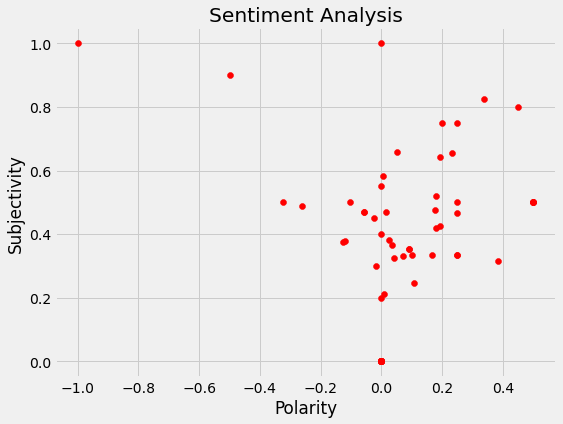

In [54]:
#PLot the polarity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color= 'Red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()
    

In [55]:
#percentage of tweets

ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['tweets']
p =round (ptweets.shape[0] / df.shape[0] * 100, 1 )
print("positive tweets percentage : " + str(p))


ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['tweets']
n= round (ntweets.shape[0] / df.shape[0] * 100, 1 )
print("negative tweets percentage : " + str(n))

netweets = df[df.Analysis == 'Neutral']
netweets = netweets['tweets']
ne= round (netweets.shape[0] / df.shape[0] * 100, 1 )
print("neutral tweets percentage : " + str(ne))

positive tweets percentage : 52.4
negative tweets percentage : 17.5
neutral tweets percentage : 30.2


In [56]:
#value counts 

df['Analysis'].value_counts()

Positive    33
Neutral     19
Negative    11
Name: Analysis, dtype: int64

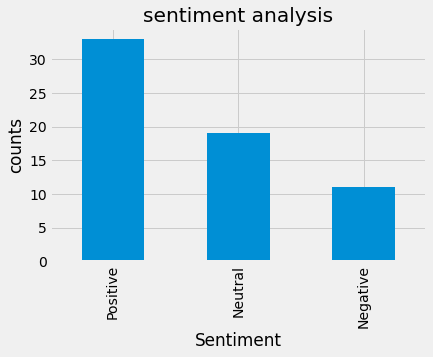

In [59]:
#plot the graph

plt.title('sentiment analysis')
plt.xlabel('Sentiment')
plt.ylabel('counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

How people are reacting on ram mandir by analyzing 2000 Tweets : 


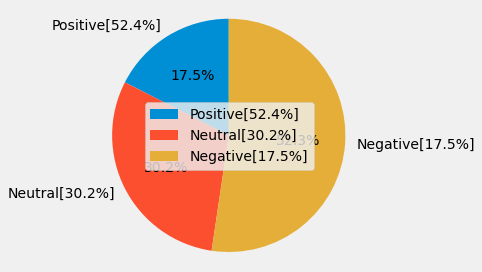

In [60]:
import matplotlib.pyplot as plt

print("How people are reacting on " + searchTerm + " by analyzing " + str(noofsearch) + " Tweets : ")

labels=[r'Positive['+str(p)+'%]',r'Neutral['+str(ne)+'%]', r'Negative['+str(n)+'%]']
sizes = [n, ne, p]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc="center")
plt.tight_layout()
plt.show()


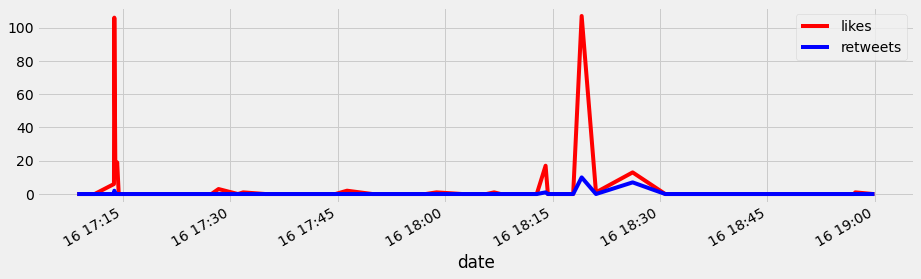

In [61]:
time_likes = pd.Series(data=df['likes'].values, index=df['date'])
time_likes.plot(figsize=(16,4), label= "likes", legend= True, color = 'r')
time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
time_retweets.plot(figsize=(14,4), label= "retweets", legend= True, color = 'b')
plt.show()